# Submitted by
# Yogesh Kakde


In [1]:
# Importing all libraries required in this notebook

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Reading data from remote link

dataset = pd.read_csv("http://bit.ly/w-data")

In [4]:
# Details about data
print("----------------------------------------DATA----------------------------------------")

print(dataset.head())
print("----------------------------------------INFORMATION----------------------------------------")
print(dataset.info())
print("----------------------------------------DESCRIPTION----------------------------------------")
print(dataset.describe())

----------------------------------------DATA----------------------------------------
   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30
----------------------------------------INFORMATION----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 480.0 bytes
None
----------------------------------------DESCRIPTION----------------------------------------
           Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000


In [8]:
# Splitting the dataset into the Training set and Test set

X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


# Training the Model


In [25]:
# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

# Prediction

In [10]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [18]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


# Visualization

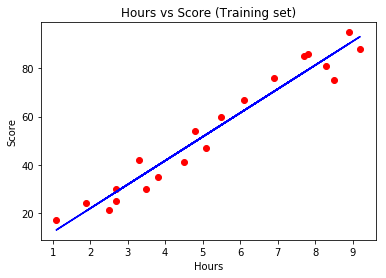

In [12]:
# Visualising the Training set results
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Hours vs Score (Training set)')
plt.xlabel('Hours')
plt.ylabel('Score')
plt.show()

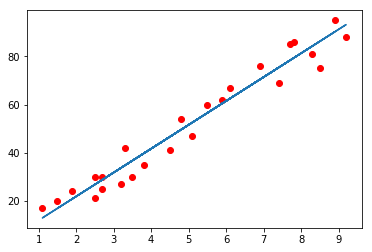

In [14]:
# Plotting the regression line (Another Method)
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y, color = 'red')
plt.plot(X, line);
plt.show()

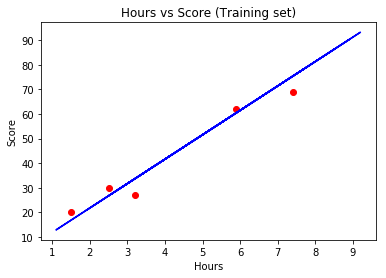

In [15]:
# Visualising the test set results
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Hours vs Score (Training set)')
plt.xlabel('Hours')
plt.ylabel('Score')
plt.show()

# Test with your own data
# What will be predicted score if a student studies for 9.25 hrs/ day?

In [23]:
# You can also test with your own data
hours = [[9.25]]
own_pred = regressor.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 93.69173248737538


# Evaluating the model

In [24]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975
